<a href="https://colab.research.google.com/github/tojahanj/Personal-Expense-Tracker/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = [
    {'date': '2024-01-10', 'category': 'Health', 'description': 'Pharmacy', 'amount': 25.5},
    {'date': '2024-01-15', 'category': 'Transport', 'description': 'Gasoline', 'amount': 40.0},
    {'date': '2024-02-07', 'category': 'Food', 'description': 'Dinner', 'amount': 30.75},
    {'date': '2024-02-20', 'category': 'Education', 'description': 'Books', 'amount': 45.0},
    {'date': '2024-03-10', 'category': 'Utilities', 'description': 'Water bill', 'amount': 35.0},
    {'date': '2024-03-12', 'category': 'Entertainment', 'description': 'Concert ticket', 'amount': 50.0},
    {'date': '2024-03-15', 'category': 'Food', 'description': 'Groceries', 'amount': 60.0},
    {'date': '2024-04-01', 'category': 'Clothing', 'description': 'Shoes', 'amount': 75.0},
    {'date': '2024-04-10', 'category': 'Health', 'description': 'Doctor visit', 'amount': 80.0},
    {'date': '2024-04-15', 'category': 'Transport', 'description': 'Taxi', 'amount': 20.0}
]

df = pd.DataFrame(data)

df.to_csv('expenses.csv', index=False)
print("CSV file 'expenses.csv' created.")
expenses = pd.read_csv('expenses.csv')
print("\nLoaded Data:")
print(expenses)
total_amount = expenses['amount'].sum()
print("\nTotal Amount Spent:", total_amount)
category_totals = expenses.groupby('category')['amount'].sum()
print("\nTotal Amount by Category:")
print(category_totals)

CSV file 'expenses.csv' created.

Loaded Data:
         date       category     description  amount
0  2024-01-10         Health        Pharmacy   25.50
1  2024-01-15      Transport        Gasoline   40.00
2  2024-02-07           Food          Dinner   30.75
3  2024-02-20      Education           Books   45.00
4  2024-03-10      Utilities      Water bill   35.00
5  2024-03-12  Entertainment  Concert ticket   50.00
6  2024-03-15           Food       Groceries   60.00
7  2024-04-01       Clothing           Shoes   75.00
8  2024-04-10         Health    Doctor visit   80.00
9  2024-04-15      Transport            Taxi   20.00

Total Amount Spent: 461.25

Total Amount by Category:
category
Clothing          75.00
Education         45.00
Entertainment     50.00
Food              90.75
Health           105.50
Transport         60.00
Utilities         35.00
Name: amount, dtype: float64


In [ ]:
#Read the stored expenses from the CSV file.
import pandas as pd

def load_expenses_from_csv(filename='expenses.csv'):
    """Reads expenses from a CSV file and returns a Pandas DataFrame."""
    try:
        df = pd.read_csv(filename)
        print(f"Expenses loaded from '{filename}' successfully.")
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return pd.DataFrame()
expenses_df = load_expenses_from_csv()
print(expenses_df)

Expenses loaded from 'expenses.csv' successfully.
         date       category     description  amount
0  2024-01-10         Health        Pharmacy   25.50
1  2024-01-15      Transport        Gasoline   40.00
2  2024-02-07           Food          Dinner   30.75
3  2024-02-20      Education           Books   45.00
4  2024-03-10      Utilities      Water bill   35.00
5  2024-03-12  Entertainment  Concert ticket   50.00
6  2024-03-15           Food       Groceries   60.00
7  2024-04-01       Clothing           Shoes   75.00
8  2024-04-10         Health    Doctor visit   80.00
9  2024-04-15      Transport            Taxi   20.00


In [ ]:
#Group expenses by category
import pandas as pd

def group_expenses_by_category(df):
    """Groups expenses by category and calculate"""
    category_expenses = df.groupby('category')['amount'].sum()
    print("\n--- Expenses by Category ---")
    print(category_expenses)
group_expenses_by_category(df)


--- Expenses by Category ---
category
Entertainment     12.00
Food              65.75
Transport          2.50
Utilities        120.00
Name: amount, dtype: float64


In [ ]:
#Analyze monthly total expenses and average daily expenses.
import pandas as pd

def analyze_monthly_expenses(df):
    """Analyzes monthly total and average daily expenses."""
    df['date'] = pd.to_datetime(df['date'])
    monthly_expenses = df.groupby(df['date'].dt.to_period('M'))['amount'].sum()
    daily_expenses = df.groupby('date')['amount'].sum()
    average_daily_expense = daily_expenses.mean()
    print("\n--- Monthly Expenses Analysis ---")
    print("Monthly Total Expenses:")
    print(monthly_expenses)
    print(f"\nAverage Daily Expense: {average_daily_expense:.2f}")
analyze_monthly_expenses(df)


--- Monthly Expenses Analysis ---
Monthly Total Expenses:
date
2024-01     65.50
2024-02     75.75
2024-03    145.00
2024-04    175.00
Freq: M, Name: amount, dtype: float64

Average Daily Expense: 46.12


In [ ]:
#Add
expenses = pd.DataFrame(data)
new_expense = {'date': '2024-02-06', 'category': 'Health', 'description': 'Medicine', 'amount': 35.0}
new_expense_df = pd.DataFrame([new_expense])
expenses = pd.concat([expenses, new_expense_df])
print(expenses)

         date       category     description  amount
0  2024-01-10         Health        Pharmacy   25.50
1  2024-01-15      Transport        Gasoline   40.00
2  2024-02-07           Food          Dinner   30.75
3  2024-02-20      Education           Books   45.00
4  2024-03-10      Utilities      Water bill   35.00
5  2024-03-12  Entertainment  Concert ticket   50.00
6  2024-03-15           Food       Groceries   60.00
7  2024-04-01       Clothing           Shoes   75.00
8  2024-04-10         Health    Doctor visit   80.00
9  2024-04-15      Transport            Taxi   20.00
0  2024-02-06         Health        Medicine   35.00


In [ ]:
#delete
def delete_expense(data, date, category):
    updated_data = [record for record in data if not (record['date'] == date and record['category'] == category)]
    return updated_data

updated_data = delete_expense(data, '2024-01-04', 'Food')
print(updated_data)

[{'date': '2024-01-01', 'category': 'Food', 'description': 'Groceries', 'amount': 50.75}, {'date': '2024-01-02', 'category': 'Transport', 'description': 'Bus ticket', 'amount': 2.5}, {'date': '2024-02-03', 'category': 'Utilities', 'description': 'Electricity bill', 'amount': 120.0}, {'date': '2024-03-04', 'category': 'Food', 'description': 'Lunch', 'amount': 15.0}, {'date': '2024-03-05', 'category': 'Entertainment', 'description': 'Movie', 'amount': 12.0}]


In [ ]:
#Generating a summary report of total and category-wise expenses.
import pandas as pd

def generate_summary_report(df):
    """Generates a summary report of total and category-wise expenses."""
    total_expenses = df['amount'].sum()
    category_expenses = df.groupby('category')['amount'].sum()
    print("\n--- Expense Summary Report ---")
    print(f"Total Expenses: {total_expenses:.2f}")
    print("\nExpenses by Category:")
    print(category_expenses)
generate_summary_report(df)


--- Expense Summary Report ---
Total Expenses: 461.25

Expenses by Category:
category
Clothing          75.00
Education         45.00
Entertainment     50.00
Food              90.75
Health           105.50
Transport         60.00
Utilities         35.00
Name: amount, dtype: float64


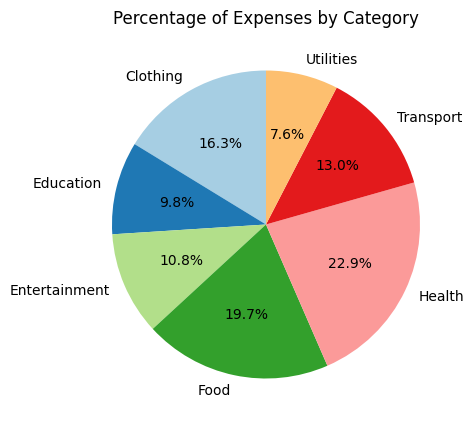

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
data = [
    {'date': '2024-01-10', 'category': 'Health', 'description': 'Pharmacy', 'amount': 25.5},
    {'date': '2024-01-15', 'category': 'Transport', 'description': 'Gasoline', 'amount': 40.0},
    {'date': '2024-02-07', 'category': 'Food', 'description': 'Dinner', 'amount': 30.75},
    {'date': '2024-02-20', 'category': 'Education', 'description': 'Books', 'amount': 45.0},
    {'date': '2024-03-10', 'category': 'Utilities', 'description': 'Water bill', 'amount': 35.0},
    {'date': '2024-03-12', 'category': 'Entertainment', 'description': 'Concert ticket', 'amount': 50.0},
    {'date': '2024-03-15', 'category': 'Food', 'description': 'Groceries', 'amount': 60.0},
    {'date': '2024-04-01', 'category': 'Clothing', 'description': 'Shoes', 'amount': 75.0},
    {'date': '2024-04-10', 'category': 'Health', 'description': 'Doctor visit', 'amount': 80.0},
    {'date': '2024-04-15', 'category': 'Transport', 'description': 'Taxi', 'amount': 20.0}
]
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
monthly_expenses = df.groupby(df['date'].dt.month)['amount'].sum()

category_expenses = df.groupby('category')['amount'].sum()
plt.figure(figsize=(5,5))
category_expenses.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Expenses by Category')
plt.ylabel('')
plt.show()

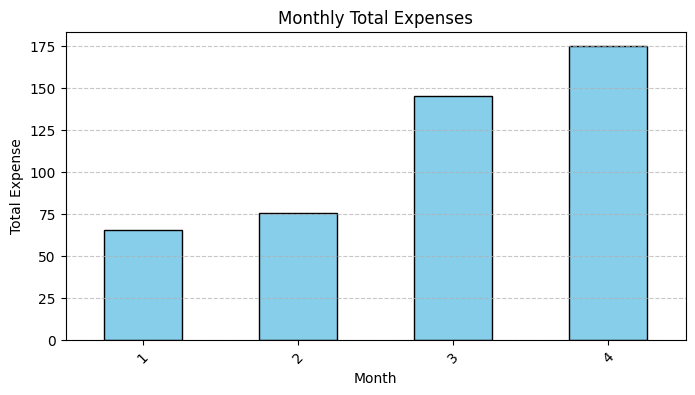

In [44]:
#bar chart
import matplotlib.pyplot as plt
import pandas as pd
data = [
    {'date': '2024-01-10', 'category': 'Health', 'description': 'Pharmacy', 'amount': 25.5},
    {'date': '2024-01-15', 'category': 'Transport', 'description': 'Gasoline', 'amount': 40.0},
    {'date': '2024-02-07', 'category': 'Food', 'description': 'Dinner', 'amount': 30.75},
    {'date': '2024-02-20', 'category': 'Education', 'description': 'Books', 'amount': 45.0},
    {'date': '2024-03-10', 'category': 'Utilities', 'description': 'Water bill', 'amount': 35.0},
    {'date': '2024-03-12', 'category': 'Entertainment', 'description': 'Concert ticket', 'amount': 50.0},
    {'date': '2024-03-15', 'category': 'Food', 'description': 'Groceries', 'amount': 60.0},
    {'date': '2024-04-01', 'category': 'Clothing', 'description': 'Shoes', 'amount': 75.0},
    {'date': '2024-04-10', 'category': 'Health', 'description': 'Doctor visit', 'amount': 80.0},
    {'date': '2024-04-15', 'category': 'Transport', 'description': 'Taxi', 'amount': 20.0}
]

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])
monthly_expenses = df.groupby(df['date'].dt.month)['amount'].sum()
plt.figure(figsize=(8, 4))
monthly_expenses.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Monthly Total Expenses')
plt.xlabel('Month')
plt.ylabel('Total Expense')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

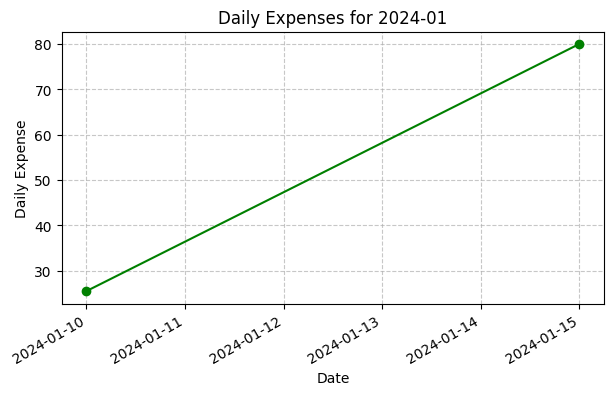

In [43]:
# Calculate total, highest, lowest, and average ex
selected_month = '2024-01'
# Change 'Date' to 'date' and 'Amount' to 'amount'
daily_expenses_selected_month = df[df['date'].dt.to_period('M') == selected_month].groupby('date')['amount'].sum()
plt.figure(figsize=(7,4))
daily_expenses_selected_month.plot(kind='line', marker='o', color='green')
plt.title(f'Daily Expenses for {selected_month}')
plt.xlabel('Date')
plt.ylabel('Daily Expense')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print(f"Data for {selected_month}:")
print(daily_expenses_selected_month)

Data for 2024-12:
Series([], Name: Amount, dtype: float64)


In [42]:

import pandas as pd

df = pd.read_csv("expenses.csv")

# Convert 'date' to datetime and 'amount' to numeric for consistency
df['date'] = pd.to_datetime(df['date'], errors='coerce') # Changed 'Date' to 'date'
df['amount'] = pd.to_numeric(df['amount'], errors='coerce') # Changed 'Amount' to 'amount'

# Function 1: Add a new expense with user input
def add_expense():
    date = input("Enter the date (YYYY-MM-DD): ")
    category = input("Enter the category (e.g., Food, Rent, Entertainment): ")
    amount = input("Enter the amount: ")
    description = input("Enter the description: ")

    try:
        # Convert date and amount to appropriate data types
        date = pd.to_datetime(date, errors='coerce')
        amount = float(amount)

        # Ensure valid date and amount input
        if pd.isna(date):
            print("Invalid date format! Please enter the date in YYYY-MM-DD format.")
            return
        if amount <= 0:
            print("Invalid amount! Please enter a positive number for the amount.")
            return

        # Create a new entry and append it to the DataFrame
        new_expense = pd.DataFrame({
            'date': [date], # Changed 'Date' to 'date'
            'category': [category],
            'amount': [amount], # Changed 'Amount' to 'amount'
            'description': [description]
        })
        global df
        df = pd.concat([df, new_expense], ignore_index=True)  # Append new entry
        df.to_csv("your_file.csv", index=False)  # Save the updated file
        print("Expense added successfully!")

    except ValueError:
        print("Invalid input for amount. Please enter a numeric value.")

# Example usage of the function to add an expense:
add_expense()

Enter the date (YYYY-MM-DD): 2024-01-15
Enter the category (e.g., Food, Rent, Entertainment): Transport
Enter the amount: 40.0
Enter the description: Gasoline
Expense added successfully!


In [ ]:
#Bonus
import re

def validate_date(date_str):
  """Validates a date string in YYYY-MM-DD format using RegEx."""
  pattern = r"^\d{4}-\d{2}-\d{2}$"
  if re.match(pattern, date_str):
    return True
  else:
    return False
date_to_check = "2024-01-01"
if validate_date(date_to_check):
  print(f"{date_to_check} is a valid date.")
else:
  print(f"{date_to_check} is not a valid date.")

2024-01-01 is a valid date.


In [ ]:
#Keyword based search
import pandas as pd

def search_expenses(expenses_df, keyword):
  """Searches for expenses based on a keyword in the description."""
  expenses_df['description'] = expenses_df['description'].str.lower()
  search_results = expenses_df[expenses_df['description'].str.contains(keyword.lower())]
  return search_results
keyword = input("Enter keyword to search for: ")
search_results = search_expenses(expenses, keyword)

if not search_results.empty:
  print("Search Results:")
  print(search_results)
else:
  print("No expenses found matching the keyword.")

Enter keyword to search for: movie
No expenses found matching the keyword.


In [40]:
#view summary
def view_summaries():
    print("\n--- View Expense Summaries ---")
    print("1. Daily Summary")
    print("2. Monthly Summary")
    print("3. Category-wise Summary")

    while True:
        try:
            choice = int(input("Enter your choice: "))
            if choice in [1, 2, 3]:
                break
            else:
                print("Invalid choice. Please enter 1, 2, or 3.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    if df.empty:
        print("No data available.")
        return

    if choice == 1:
        print("\nDaily Summary:")
        print(df.groupby("date")["amount"].sum())
    elif choice == 2:
        print("\nMonthly Summary:")
        df['Month'] = pd.to_datetime(df['date']).dt.month
        print(df.groupby("Month")["amount"].sum())
    elif choice == 3:
        print("\nCategory-wise Summary:")
        print(df.groupby("category")["amount"].sum())
    else:
        print("Invalid choice, please try again.")

view_summaries()


--- View Expense Summaries ---
1. Daily Summary
2. Monthly Summary
3. Category-wise Summary
Enter your choice: 1

Daily Summary:
date
2024-01-10    51.00
2024-01-15    40.00
2024-02-07    30.75
2024-02-20    45.00
2024-03-10    35.00
2024-03-12    50.00
2024-03-15    60.00
2024-04-01    75.00
2024-04-10    80.00
2024-04-15    20.00
Name: amount, dtype: float64


In [ ]:
import pandas as pd

# Assuming 'expenses' is your DataFrame (loaded from 'expenses.csv')

def update_expense(expenses_df, date, category, new_description, new_amount):
    """Updates an existing expense entry in the DataFrame."""
    mask = (expenses_df['date'] == date) & (expenses_df['category'] == category)
    if mask.any():
        expenses_df.loc[mask, 'description'] = new_description
        expenses_df.loc[mask, 'amount'] = new_amount
        print("Record updated successfully!")
    else:
        print("No matching record found.")

def delete_expense(expenses_df, date, category):
    """Deletes an expense entry from the DataFrame."""
    mask = (expenses_df['date'] == date) & (expenses_df['category'] == category)
    if mask.any():
        expenses_df.drop(expenses_df[mask].index, inplace=True)
        print("Record deleted successfully!")
    else:
        print("No matching record found.")
update_expense(expenses, '2024-01-03', 'Utilities', 'Gas bill', 85.0)
delete_expense(expenses, '2024-01-04', 'Food')
print(expenses)

No matching record found.
No matching record found.
   Unnamed: 0        date       category     description  amount
0           0  2024-01-10         Health        pharmacy   25.50
1           1  2024-01-15      Transport        gasoline   40.00
2           2  2024-02-07           Food          dinner   30.75
3           3  2024-02-20      Education           books   45.00
4           4  2024-03-10      Utilities      water bill   35.00
5           5  2024-03-12  Entertainment  concert ticket   50.00
6           6  2024-03-15           Food       groceries   60.00
7           7  2024-04-01       Clothing           shoes   75.00
8           8  2024-04-10         Health    doctor visit   80.00
9           9  2024-04-15      Transport            taxi   20.00


In [ ]:
#deleting
import pandas as pd  # Make sure pandas is imported

def load_expenses_from_csv(filename='expenses.csv'):
    """Reads expenses from a CSV file and returns a Pandas DataFrame."""
    try:
        df = pd.read_csv(filename)
        print(f"Expenses loaded from '{filename}' successfully.")
        return df
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found.")
        return pd.DataFrame()

def delete_expense():
    expense_id = int(input("Enter the expense ID to delete: "))
    df = load_expenses_from_csv()  # Call the existing load_expenses_from_csv function
    if df.empty or expense_id not in df.index:
        print("Expense ID not found.")
        return

    df = df.drop(expense_id)
    df.to_csv("new_expenses.csv", index=False)
    print("Expense deleted successfully!")
delete_expense()

Enter the expense ID to delete: 2
Expenses loaded from 'expenses.csv' successfully.
Expense deleted successfully!


In [ ]:
# Calculate total, highest, lowest, and average expenses
import pandas as pd

def calculate_statistics(df):
    """Calculates and prints statistical measures of expenses."""
    total_expenses = df['amount'].sum()
    highest_expense = df['amount'].max()
    lowest_expense = df['amount'].min()
    average_expense = df['amount'].mean()
    print("\n--- Expense Statistics ---")
    print(f"Total Expenses: {total_expenses:.2f}")
    print(f"Highest Expense: {highest_expense:.2f}")
    print(f"Lowest Expense: {lowest_expense:.2f}")
    print(f"Average Expense: {average_expense:.2f}")
calculate_statistics(df)


--- Expense Statistics ---
Total Expenses: 200.25
Highest Expense: 120.00
Lowest Expense: 2.50
Average Expense: 40.05


In [ ]:
import pandas as pd

def identify_spending_trends(df):
    """Identifies and prints spending trends."""
    df['date'] = pd.to_datetime(df['date'])
    daily_expenses = df.groupby('date')['amount'].sum()
    highest_expense_day = daily_expenses.idxmax()
    lowest_expense_day = daily_expenses.idxmin()
    print("\n--- Spending Trends ---")
    print(f"Day with Highest Expense: {highest_expense_day.strftime('%Y-%m-%d')} ({daily_expenses.max():.2f})")
    print(f"Day with Lowest Expense: {lowest_expense_day.strftime('%Y-%m-%d')} ({daily_expenses.min():.2f})")
identify_spending_trends(df)


--- Spending Trends ---
Day with Highest Expense: 2024-01-03 (120.00)
Day with Lowest Expense: 2024-01-02 (2.50)
